w[0]: 0.393906  b: -0.031804


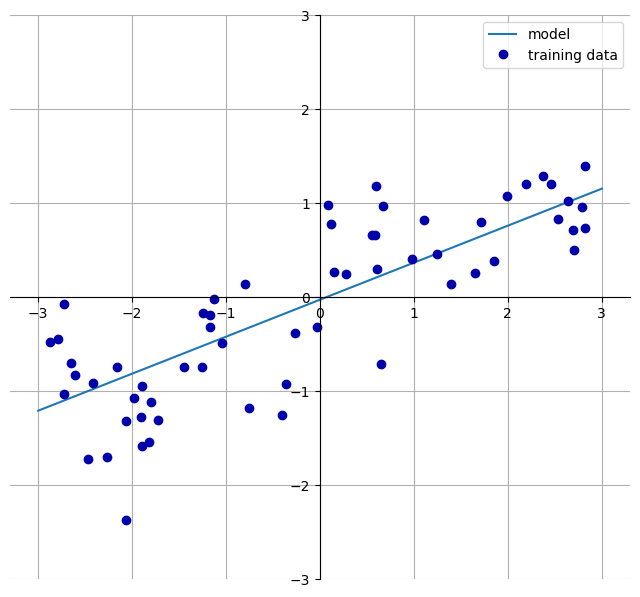

In [1]:
import mglearn 
import matplotlib.pyplot as plt
mglearn.plots.plot_linear_regression_wave()
plt.show()



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [3]:
from sklearn.svm import LinearSVC

### 커널기법
데이터셋에서 비선형 특성을 추가하여 선형모델을 강력하게 만들어 봤음 
많은 경우 어떤 특성을 추가해야 할지 모르고 많이 추가하면 연산 비용이 커진다. 
수학적 기법을 사용하여 새로운 특성을 많이 만들지 않고 분류기를 학습시킬 수 있다.  이를 커널 기법(kernel trick)이라 한다.

실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트 들의 거리를 계산한다. 
SVM에서 데이터를 고차원 공간에 매핑하는데 많이 사용하는 방법은 두 가지이다. 
원래 특성의 가능한 조합을 지정된 차수까지 모두계산하는 다항식커널이 있고
가우시안 커널로 불리우는 RBF(Radial Base Function) 커널이 있다. 
가우시안 커널은 차원이 무한한 특성 공간에 매핑하는 방법이다.

-SVM 이해하기 
학습이 진행되는 동안 svm은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배우게 된다. 
일반적으로 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 준다. 
바로 두 클래스 사이의 경계에 위치한 데이터 포인트이다. 
이런 데이터 포인트를 서포트벡터(support vector)라 하며, 여기서 서포트 벡터 머신이란 이름이 유래했다.
새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다. 
분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련과정에서 학습한다. (SVC객체의 dual_coef_ 속성에 저장된다.)
- k<sub>rbf</sub> (x<sub>1</sub>, x<sub>2</sub>) = exp(-$\gamma$ || x<sub>1</sub> - x<sub>2</sub> ||<sup>2</sup>)  
- 여기서 x<sub>1</sub> 과 x<sub>2</sub> 는 데이터 포인트이며 || x<sub>1</sub> - x<sub>2</sub> ||<sup>2</sup> 는 유클리디안 거리이고, $\gamma$ 는 가우시안 커널의 폭을 제어하는 매개변수  

다음은 두개의 클래스를 가진 2차원 데이터셋에 서포트 벡터머신을 학습시킨 결과를 보여준다. 

결정경계는 검은 실선으로, 서포트 벡터는 굵은 테두리로 그렸다. 

forge 데이터셋에 svm을 학습시켜 그래프를 그림


In [4]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
plt.figure(figsize=(10,8))
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

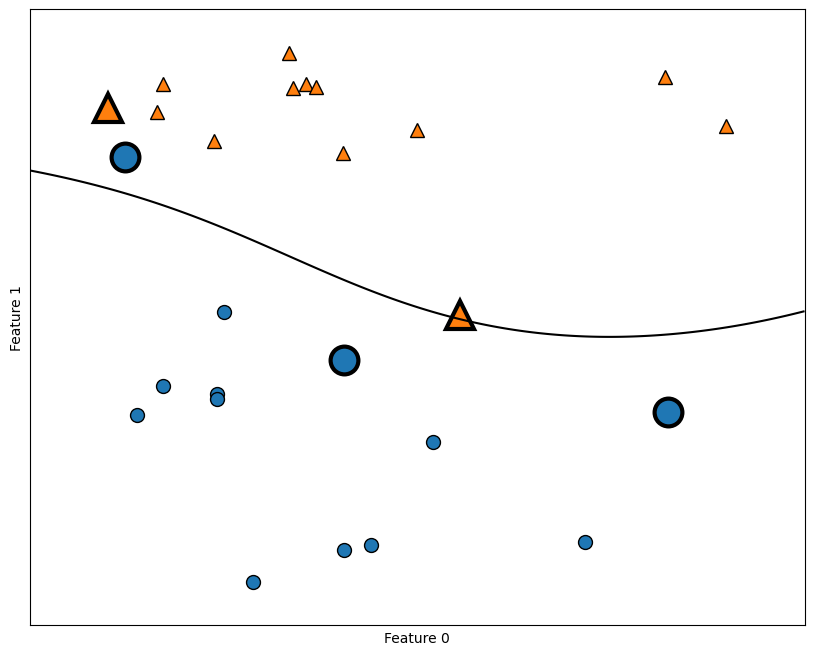

In [16]:
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=20, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### SVM 매개변수 튜닝 
gamma 매개변수는 앞 공식에 나와있는 감마(슬랙에 있음)로 가우시간 커널 폭의 역수에 해당한다. 
gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 
작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적이다. 
즉, 가우시안 커널의 반경이 클 수록 훈련 샘플의 영향범위도 커진다. 
C매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수다. 


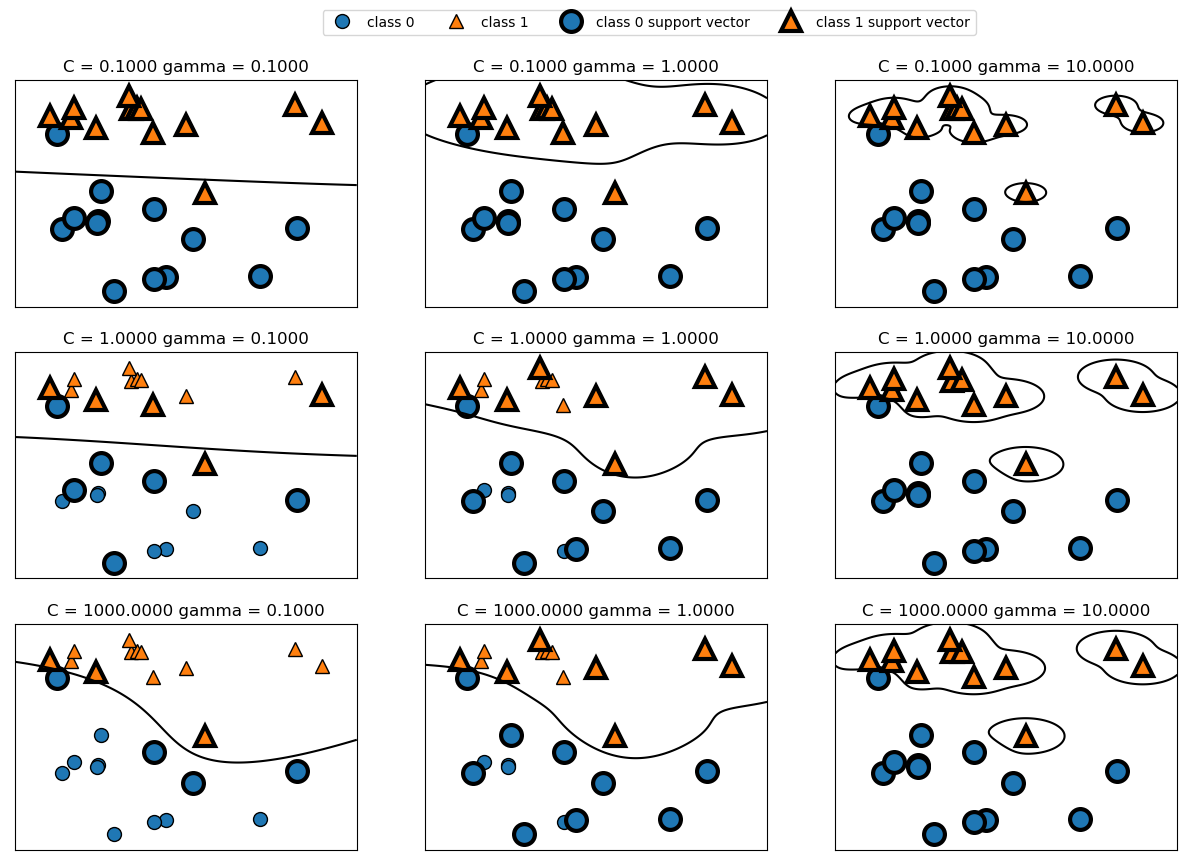

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()


왼쪽에서 오른쪽으로 가면서 감마값이 0.1에서 10으로 증가한다. 
작은 감마값은 가우시안 커널의 반경을 크게하여 많은 포인트들이 가까이있는 것으로 고려된다. 

그래서 왼쪽 그림의 결정경계는 매우 부드럽고 오른 쪽으로 갈수록 결정경계는 하나의 포인트에 더 민감해진다. 

작은 감마 값이 결정경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춘다. 반면에 큰 감마값은 더 복잡한 모델을 만든다. 

위에서 아래로는 C매개변수를 0.1에서 1000으로 증가시켰다 

선형 모델에서처럼 C는 매우 제약이 큰 모델을 만들고 각 데이터포인트들이 모델에 큰 영향을 주어 결정 경계를 휘게 해서 정확하게 분류한다. 

RBF 커널 SVM을 유방암 데이터셋ㄴ에 적용해볼것이다. 기본값 C=1, gamma=1/n_feature를 사용한다. 

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc= SVC()
svc.fit(X_train, y_train)

print("train set 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("test set 정확도: {:.2f}".format(svc.score(X_test, y_test)))


train set 정확도: 0.90
test set 정확도: 0.94


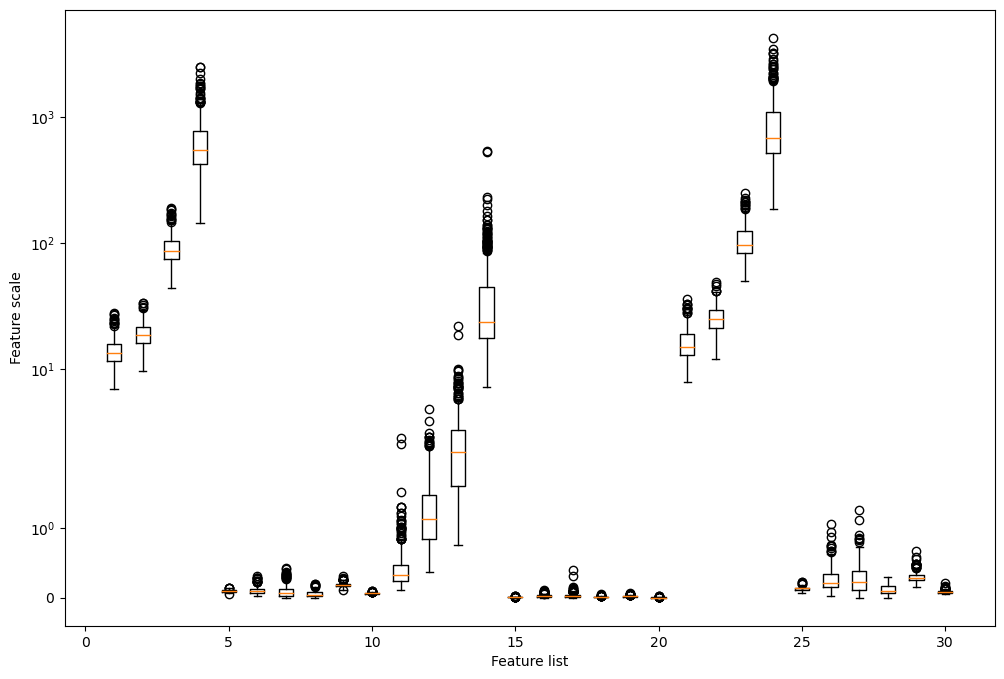

In [21]:
plt.figure(figsize=(12,8))
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature scale")
plt.show()

In [22]:
#min-max 스케일링 직접해보기 
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Feature min\n", X_train_scaled.min(axis=0))
print("Feature max\n", X_train_scaled.max(axis=0))

Feature min
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Feature max
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [23]:
#테스트 세트에도 같은 작업을 적용하지만 
#훈련 세트에서 계산한 최솟값과 범위를 사용한다.(자세한 내용은 비지도 학습에서 언급)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [25]:
svc= SVC()
svc.fit(X_train_scaled, y_train)

print("train set 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("test set 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))


train set 정확도: 0.98
test set 정확도: 0.97


In [26]:
svc= SVC(C=20)
#c값을 증가시킨다는것은 제약을 풀어준다는것입니다...
svc.fit(X_train_scaled, y_train)

print("train set 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("test set 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))


train set 정확도: 0.99
test set 정확도: 0.98


### 장단점 


커널 서포트 벡터머신은 강력한 모델이며 다양한 데이터셋에서 잘 작동한다.  

SVM은 데이터의 특성이 몇개 안되더라도 복잡한 결정 경계를 만들 수 있다. 

저차원과 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 떄는 잘 맞지않는다. 
(이와 반대로 딥러닝은 샘플이 많을수록 정확도가 향상된다.)

SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써줘야 한다는 것이다. 

SVM 모델은 분석하기도 어렵고, 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가들에게 모델을 설명하기가 난해하다. 
